#### Parte I - Analizando la base

In [1]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Importamos el dataset
os.chdir("            ")


In [3]:

#Abrimos el dataset
df = pd.read_excel("inputs/usu_individual_T123.xlsx")

In [4]:
print(df.head(3))
print(df.columns)
print(f'Cantidad de personas: {len(df)}')

                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNORVWHLMKOCDEOHCH00720228  2023          1          1           5    0   
1  TQRMNOPSTHKMKPCDEOHCH00781447  2023          1          1           1    1   
2  TQRMNOQSXHMOKRCDEOHCH00803177  2023          1          1           1    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR      IPCF  \
0      44       N          91      112  ...     10.0        9   79700.0   
1      44       N          91      190  ...      6.0        5  180000.0   
2      44       N          91      134  ...      8.0        8  145000.0   

   DECCFR  IDECCFR  RDECCFR  GDECCFR  PDECCFR  ADECCFR  PONDIH  
0       6      6.0        5      NaN      7.0        5     133  
1       9     10.0        9      NaN     10.0        9     200  
2       9      9.0        8      NaN      9.0        8     140  

[3 rows x 177 columns]
Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', '

In [5]:
#Filtro por aglomerados tomando solo los aglomerados 32 y 33
df=df[(df['AGLOMERADO']==32)| (df['AGLOMERADO'] == 33)]
pd.set_option('display.max_columns', None)
print(f'Cantidad de personas: {len(df)}')

Cantidad de personas: 7619


In [6]:
# Filtrar valores negativos - REVISAR SI HAY MÁS VALORES SIN SENTIDO
df = df[(df['IPCF'] >= 0) & (df['CH06'] >= 0)]

# Revisamos que no queden valores negativos de las variables de interés
print(df['IPCF'].min())
print(df['CH06'].min())


0.0
1


In [7]:
#Filtro por sexo y pongo los nombres utilizados en la encuesta

sex_composition = df['CH04'].replace({1: 'Varón', 2: 'Mujer'}).value_counts()


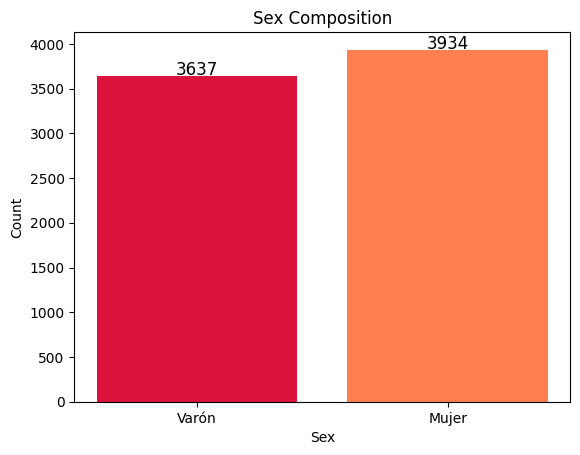

In [8]:
import matplotlib.pyplot as plt

# Sample data
sex_composition = df['CH04'].replace({1: 'Varón', 2: 'Mujer'}).value_counts()

# Define the desired order of bars
bar_order = ['Varón', 'Mujer']

# Create a figure and axis
fig, ax = plt.subplots()

# Define colors
colors = ['crimson','coral']

# Create the bar graph with the specified order
bars = ax.bar(bar_order, sex_composition[bar_order], color=colors)

# Add data labels above the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1), textcoords='offset points', ha='center', fontsize=12)

# Set labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Composition')


# Show the plot
plt.show()

In [9]:
# las varaibles CH07 y CH08 son categoricas por lo que su interpretacion no tiene sentido en la matriz
df_matrix = df
df_matrix= df_matrix[(df_matrix['AGLOMERADO']==32)| (df_matrix['AGLOMERADO'] == 33)]
df_matrix = df_matrix[(df_matrix['IPCF'] >= 0) & (df_matrix['CH06'] >= 0)]

# Dummy soltero/casado = 1 si CH07 = 1 o 2
df_matrix['CH07_dummy'] = np.where(df_matrix['CH07'].isin([1,2]), 1, 0)
# Dummy Cobertura medica = 1 si CH08 = 1,2,3,12,13,23,123
df_matrix['CH08_dummy'] = np.where(df_matrix['CH08'].isin([1,2,3,12,13,23,123]), 1, 0)
# Dummy ESTADO = 1 si ESTADO = 1 , 0 sino
df_matrix['estado_ocupado'] = np.where(df_matrix['ESTADO']==1, 1, 0)
# Geeneramos dummies para las diferentes categorias de CAT_INAC
df_matrix['Rentista'] = np.where(df_matrix['CAT_INAC']==2, 1, 0)
df_matrix['Jubilado'] = np.where(df_matrix['CAT_INAC']==1, 1, 0)
df_matrix['Estudiante'] = np.where(df_matrix['CAT_INAC']==3, 1, 0)


#Armo la matriz de correlaciones
correlation_matrix = df_matrix[['CH04', 'CH07_dummy', 'CH08_dummy', 'NIVEL_ED', 'estado_ocupado', 'Rentista','Jubilado', 'Estudiante', 'IPCF']].corr()
# rename cols
correlation_matrix = correlation_matrix.rename(columns={'CH04': 'Sexo', 'CH07_dummy': 'Estado Civil', 'CH08_dummy': 'Cobertura medica', 'NIVEL_ED': 'Nivel educativo', 'estado_ocupado': 'Ocupado', 'IPCF': 'Ingreso per cápita familiar'})
# rename rows
correlation_matrix = correlation_matrix.rename(index={'CH04': 'Sexo', 'CH07_dummy': 'Estado Civil', 'CH08_dummy': 'Cobertura medica', 'NIVEL_ED': 'Nivel educativo', 'estado_ocupado': 'Ocupado', 'IPCF': 'Ingreso per cápita familiar'})



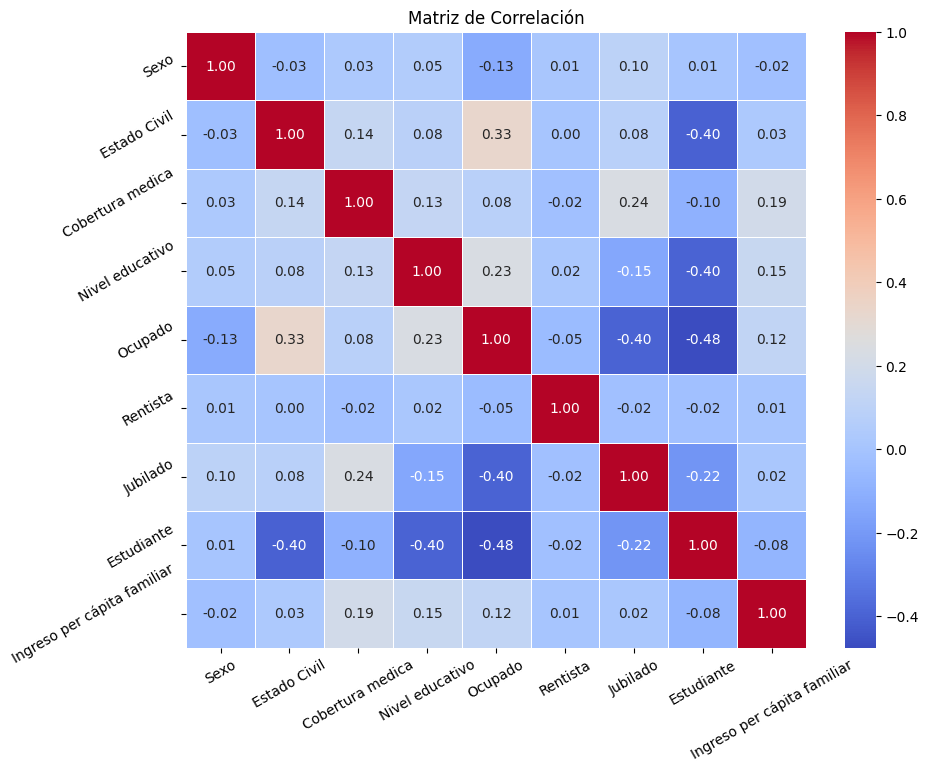

In [10]:
# CreO un mapa de calor usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')

# Change variables labels in the plot
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()


In [12]:
#¿Cuantos desocupados hay en la muestra? ¿Cu ́antos inactivos? ¿Cu ́al es
#la media de ingreso per cápita familiar (IPCF) seg ́un estado (ocupado,
#desocupado, inactivo)?


#Filtro por estado laboral
desocupados = df[df['ESTADO'] == 2]
inactivos = df[df['ESTADO'] == 3]
ocupados = df[df['ESTADO'] == 1]

#Veo sus ingresos per capita familiar según su estado
media_ipcf = df['IPCF'].mean()
media_ipcf_ocupados = ocupados['IPCF'].mean()
media_ipcf_desocupados = desocupados['IPCF'].mean()
media_ipcf_inactivos = inactivos['IPCF'].mean()

#Imprimo los resultados y respuestas a las preguntas: 
print(f'Ocupados: {len(ocupados)} personas')
print(f'Desocupados: {len(desocupados)} personas')
print(f'Inactivos: {len(inactivos)} personas')
print(f'Media ingreso per cápita familiar (Total): ${media_ipcf}')
print(f'Media ingreso per cápita familiar (Ocupados): ${media_ipcf_ocupados}')
print(f'Media ingreso per cápita familiar (Desocupados): ${media_ipcf_desocupados}')
print(f'Media ingreso per cápita familiar (Inactivos): ${media_ipcf_inactivos}')





Ocupados: 3523 personas
Desocupados: 286 personas
Inactivos: 2837 personas
Media ingreso per cápita familiar (Total): $47720.438939373926
Media ingreso per cápita familiar (Ocupados): $59579.44291512915
Media ingreso per cápita familiar (Desocupados): $25536.022202797205
Media ingreso per cápita familiar (Inactivos): $40067.99605216778


In [14]:
adulto_equiv_data = pd.read_excel("inputs/tabla_adulto_equiv.xlsx")


# melt adulto_equiv_data Muejeres y Hombres
adulto_equiv_data = pd.melt(adulto_equiv_data, id_vars=['Edad'], value_name= 'adulto_equiv')
print(adulto_equiv_data.head(3))
# Change values of variable column to 1 if Hom and 2 if Muj
adulto_equiv_data['variable'] = np.where(adulto_equiv_data['variable']=='Mujeres', 2, 1)
# Rename variable column to Sexo
adulto_equiv_data = adulto_equiv_data.rename(columns={'variable': 'Sexo'})
print(adulto_equiv_data.head(3))


              Edad variable  adulto_equiv
0  Menor de 1 años  Mujeres          0.35
1           1 años  Mujeres          0.37
2           2 años  Mujeres          0.46
              Edad  Sexo  adulto_equiv
0  Menor de 1 años     2          0.35
1           1 años     2          0.37
2           2 años     2          0.46


In [15]:
#Agrego una columna vacía rangoetareo a la tabla original, que corresponda con la categorización de la tabla nueva. En base a eso (y género) vamos a matchear

#df["rangoetareo"]

#Función que lee los valores de edad en números CH06 y me lo impacta en la categoría etarea correspondiende de la nueva tabla.
def rango_edad(edad):
    if edad < 18:
        rangoetareo = str(edad)+" años"
    elif 17 < edad and edad < 30:
        rangoetareo = "18 a 29 años"
    elif 29 < edad and edad < 46:
        rangoetareo = "30 a 45 años"
    elif 45 < edad and edad < 61:
        rangoetareo = "46 a 60 años"
    elif 60 < edad and edad < 76:
        rangoetareo = "61 a 75 años"
    elif edad > 75:
        rangoetareo = "más de 75 años"
 #   elif for n in range(1,18):
  #      rangoetareo = 
        
    else:
        rangoetareo = "ERROR"
    return rangoetareo

#Aplico la función a mi tabla para crear la columna deseada
df['rango_etareo'] = df['CH06'].apply(rango_edad)


#Renombro la columna "edad", igual que la de la otra tabla
df = df.rename(columns={'rango_etareo': 'Edad'})
df = df.rename(columns={'CH04': 'Sexo'})


#Para chequear no haber perdido datos
print(f'Cantidad de personas : {len(df)}')


Cantidad de personas : 7571


In [16]:
# Hacemos el merge de las dos tablas
merged_df = df.merge(adulto_equiv_data, on=['Sexo','Edad'], how='left')

In [17]:
#Sumo para las personas de un mismo hogary loguardo como ad_equiv_hogar
merged_df['ad_equiv_hogar'] = merged_df.groupby('CODUSU')['adulto_equiv'].transform('sum')


                           CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
0   TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           1   
1   TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           2   
2   TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           1   
3   TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           2   
4   TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           3   
5   TQRMNOSWQHJLQRCDEIJAH00796254  2023          1          1           1   
6   TQRMNOSWQHJLQRCDEIJAH00796254  2023          1          1           2   
7   TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           1   
8   TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           2   
9   TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           3   
10  TQRMNOTTTHKNLSCDEIIAD00780051  2023          1          1           1   
11  TQRMNOSRXHKMLUCDEIIAD00780093  2023          1          1           1   

In [18]:
respondieron = merged_df[merged_df['ITF'] > 0]
#print(respondieron.head(3))
respondieron = respondieron.reset_index(drop=True)
norespondieron = merged_df[merged_df['ITF'] <= 0]
norespondieron = norespondieron.reset_index(drop=True)
#print(norespondieron.head(3))


print(f'Cantidad de personas: {len(merged_df)}')
#Cantidad de personas que no respondieron ingresos

print(f'Cantidad de personas que no respondieron ingresos: {len(norespondieron)}')
#Cantidad de personas que respondieron ingresos
print(f'Cantidad de personas que respondieron ingresos: {len(respondieron)}')

Cantidad de personas: 7571
Cantidad de personas que no respondieron ingresos: 3390
Cantidad de personas que respondieron ingresos: 4181


In [20]:
# Punto 1.4: Agregar columna que indica el ingreso necesario del hogar para no ser pobre
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * 53371.05




In [21]:
# Punto 1.4: Columna que indica si una persona es pobre según el ingreso de su hogar
respondieron.loc[:, 'pobre'] = (respondieron['ingreso_necesario'] > respondieron['ITF']).astype(int)

mean_pobres = respondieron['pobre'].mean()

#

print(f'Porcentaje de pobres: {round(mean_pobres*100,2)}%')

Porcentaje de pobres: 34.7%


In [22]:
# Guardar respondieron y norespondieron en excel
respondieron.to_excel("inputs/respondieron.xlsx")
norespondieron.to_excel("inputs/norespondieron.xlsx") 